**Importing packages**

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats

**Reading data**

In [55]:
final_data=pd.read_parquet('../../../data/final_covid_data.parquet.gzip', engine='pyarrow')
final_data

,countyFIPS,County Name,State,StateFIPS,date,confirmed,deaths,population
0,0,statewide unallocated,AL,1,2020-01-22,0,0,0
1,0,statewide unallocated,AL,1,2020-01-23,0,0,0
2,0,statewide unallocated,AL,1,2020-01-24,0,0,0
3,0,statewide unallocated,AL,1,2020-01-25,0,0,0
4,0,statewide unallocated,AL,1,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
1797496,56045,weston county,WY,56,2021-08-12,700,6,6927
1797497,56045,weston county,WY,56,2021-08-13,700,6,6927
1797498,56045,weston county,WY,56,2021-08-14,705,6,6927
1797499,56045,weston county,WY,56,2021-08-15,705,6,6927


**Removing unallocated Statewide data**

In [56]:
#Selecting data by county name == statewide unallocated
final_data=final_data[final_data['County Name']!='statewide unallocated']
final_data

,countyFIPS,County Name,State,StateFIPS,date,confirmed,deaths,population
573,1001,autauga county,AL,1,2020-01-22,0,0,55869
574,1001,autauga county,AL,1,2020-01-23,0,0,55869
575,1001,autauga county,AL,1,2020-01-24,0,0,55869
576,1001,autauga county,AL,1,2020-01-25,0,0,55869
577,1001,autauga county,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
1797496,56045,weston county,WY,56,2021-08-12,700,6,6927
1797497,56045,weston county,WY,56,2021-08-13,700,6,6927
1797498,56045,weston county,WY,56,2021-08-14,705,6,6927
1797499,56045,weston county,WY,56,2021-08-15,705,6,6927


**Selecting Michigan**


In [57]:
#Selecting data by state == Michigan
MI_covid_details=final_data[final_data['State']=='MI']
MI_covid_details=MI_covid_details.groupby(["State","date"]).sum().reset_index().drop(columns=['countyFIPS','population','StateFIPS'])
MI_covid_details

,State,date,confirmed,deaths
0,MI,2020-01-22,0,0
1,MI,2020-01-23,0,0
2,MI,2020-01-24,0,0
3,MI,2020-01-25,0,0
4,MI,2020-01-26,0,0
...,...,...,...,...
568,MI,2021-08-12,996091,21078
569,MI,2021-08-13,999700,21110
570,MI,2021-08-14,999700,21110
571,MI,2021-08-15,999700,21110


In [58]:
print(MI_covid_details['confirmed']>0)

0      False
1      False
2      False
3      False
4      False
       ...  
568     True
569     True
570     True
571     True
572     True
Name: confirmed, Length: 573, dtype: bool


In [59]:
data=MI_covid_details[ (MI_covid_details['confirmed'] > 0)]

In [60]:
data

,State,date,confirmed,deaths
48,MI,2020-03-10,2,0
49,MI,2020-03-11,2,0
50,MI,2020-03-12,12,0
51,MI,2020-03-13,24,0
52,MI,2020-03-14,32,0
...,...,...,...,...
568,MI,2021-08-12,996091,21078
569,MI,2021-08-13,999700,21110
570,MI,2021-08-14,999700,21110
571,MI,2021-08-15,999700,21110


In [61]:
#Creating new columns using .diff() function
data['Number of new cases']=data['confirmed'].diff()
data['Number of new deaths']=data['deaths'].diff()
data


C:\Users\hp\AppData\Local\Temp\ipykernel_10624\353169590.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\AppData\Local\Temp\ipykernel_10624\353169590.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,date,confirmed,deaths,Number of new cases,Number of new deaths
48,MI,2020-03-10,2,0,NaN,NaN
49,MI,2020-03-11,2,0,0.0,0.0
50,MI,2020-03-12,12,0,10.0,0.0
51,MI,2020-03-13,24,0,12.0,0.0
52,MI,2020-03-14,32,0,8.0,0.0
...,...,...,...,...,...,...
568,MI,2021-08-12,996091,21078,0.0,0.0
569,MI,2021-08-13,999700,21110,3609.0,32.0
570,MI,2021-08-14,999700,21110,0.0,0.0
571,MI,2021-08-15,999700,21110,0.0,0.0


In [62]:
first_date = data[data['confirmed'] > 0]['date'].min()
first_date

Timestamp('2020-03-10 00:00:00')

In [63]:
#Determinig new column-No_of_days_since_first_case
data['No_of_days_since_first_case'] = (data['date'] - first_date).dt.days
data

C:\Users\hp\AppData\Local\Temp\ipykernel_10624\3362537362.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,date,confirmed,deaths,Number of new cases,Number of new deaths,No_of_days_since_first_case
48,MI,2020-03-10,2,0,NaN,NaN,0
49,MI,2020-03-11,2,0,0.0,0.0,1
50,MI,2020-03-12,12,0,10.0,0.0,2
51,MI,2020-03-13,24,0,12.0,0.0,3
52,MI,2020-03-14,32,0,8.0,0.0,4
...,...,...,...,...,...,...,...
568,MI,2021-08-12,996091,21078,0.0,0.0,520
569,MI,2021-08-13,999700,21110,3609.0,32.0,521
570,MI,2021-08-14,999700,21110,0.0,0.0,522
571,MI,2021-08-15,999700,21110,0.0,0.0,523


In [64]:
#Cleaning data
data=data.dropna()

In [65]:
data

,State,date,confirmed,deaths,Number of new cases,Number of new deaths,No_of_days_since_first_case
49,MI,2020-03-11,2,0,0.0,0.0,1
50,MI,2020-03-12,12,0,10.0,0.0,2
51,MI,2020-03-13,24,0,12.0,0.0,3
52,MI,2020-03-14,32,0,8.0,0.0,4
53,MI,2020-03-15,52,0,20.0,0.0,5
...,...,...,...,...,...,...,...
568,MI,2021-08-12,996091,21078,0.0,0.0,520
569,MI,2021-08-13,999700,21110,3609.0,32.0,521
570,MI,2021-08-14,999700,21110,0.0,0.0,522
571,MI,2021-08-15,999700,21110,0.0,0.0,523


In [66]:
#Printing Number of days between first covid confirmed case and the most latest covid confirmed cases
def numOfDays(date1, date2):
    return (date2-date1).days
date1 = date(2020, 3, 11)
date2 = date(2021, 8, 16)
print(numOfDays(date1, date2), "days")

523 days


In [67]:
data = data[data['date'] >= first_date]
data

,State,date,confirmed,deaths,Number of new cases,Number of new deaths,No_of_days_since_first_case
49,MI,2020-03-11,2,0,0.0,0.0,1
50,MI,2020-03-12,12,0,10.0,0.0,2
51,MI,2020-03-13,24,0,12.0,0.0,3
52,MI,2020-03-14,32,0,8.0,0.0,4
53,MI,2020-03-15,52,0,20.0,0.0,5
...,...,...,...,...,...,...,...
568,MI,2021-08-12,996091,21078,0.0,0.0,520
569,MI,2021-08-13,999700,21110,3609.0,32.0,521
570,MI,2021-08-14,999700,21110,0.0,0.0,522
571,MI,2021-08-15,999700,21110,0.0,0.0,523


***Plotting graph***

***for x='No_of_days_since_first_case' , y='Number of new cases', 'Number of new deaths'***

In [68]:
fig = px.area(data, x='No_of_days_since_first_case', y=['Number of new cases', 'Number of new deaths'])

In [69]:
fig.show()

***Linear Regression Model for Number of new cases in Michigan State***

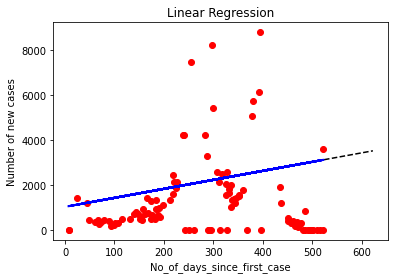

Root Mean Square Error: 2003.1774889894125


In [70]:
#Splitting data into test and train datasets using train_test_split funtion
#Fitting a linear regression model
x=np.array(data['No_of_days_since_first_case']).reshape((-1, 1))
y=np.array(data['Number of new cases'])
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 10)
model= LinearRegression()
model.fit(X_train,y_train)
p_y = model.predict(X_test)


#predicting path
p_days = 100
days = x[-1] + np.arange(p_days)
forecast = model.predict(days.reshape(-1, 1))
plt.plot(days, forecast, '--', color='black')

plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, p_y, color='blue', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('No_of_days_since_first_case')
plt.ylabel('Number of new cases')
plt.show()


print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, p_y)))

***Polynomial Regression for Number New of cases***

In [71]:
#Fitting a Polynomial regression model
poly_Reg = PolynomialFeatures(degree=4)
X_poly = poly_Reg.fit_transform(x)
pol_Reg = LinearRegression()
pol_Reg.fit(X_poly, y)   
p_y1 = pol_Reg.predict(X_poly) 

#predicting path
p_days = 100
days = x[-1] + np.arange(p_days)
fore_poly = poly_Reg.fit_transform(days.reshape(-1, 1))
forecast = pol_Reg.predict(fore_poly)


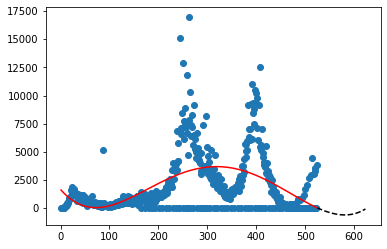

Root Mean Square Error: 2056.341480946388


In [72]:
plt.plot(days, forecast, '--', color='black')
plt.scatter(x, y)
plt.plot(x,p_y1,color='red')
plt.show()

#Determining RMSE
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(x, p_y1)))

***Linear Regression for Number of new deaths in Michigan state***

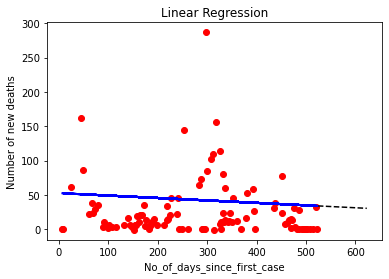

Root Mean Square Error: 45.1913782536943


In [73]:
x1=np.array(data['No_of_days_since_first_case']).reshape((-1, 1))
y1=np.array(data['Number of new deaths'])
X_train, X_test, y_train, y_test = train_test_split(x1,y1, train_size = 0.8, test_size = 0.2, random_state = 10)
model= LinearRegression()
model.fit(X_train,y_train)
p_y2 = model.predict(X_test)

#predicting path
p_days = 100
days = x[-1] + np.arange(p_days)
forecast = model.predict(days.reshape(-1, 1))
plt.plot(days, forecast, '--', color='black')

plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, p_y2, color='blue', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('No_of_days_since_first_case')
plt.ylabel('Number of new deaths')
plt.show()

print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, p_y2)))

***Polynomial Regression for New deaths***

In [74]:
poly_Reg = PolynomialFeatures(degree=4)
X_poly = poly_Reg.fit_transform(x1)
pol_Reg = LinearRegression()
pol_Reg.fit(X_poly, y1)   
p_y3 = pol_Reg.predict(X_poly) 


#predicting path
p_days = 100
days = x1[-1] + np.arange(p_days)
fore_poly = poly_Reg.fit_transform(days.reshape(-1, 1))
forecast = pol_Reg.predict(fore_poly)


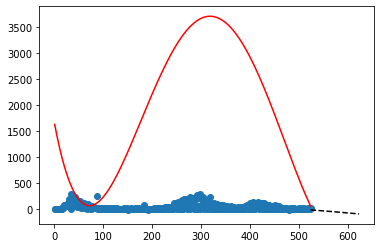

Root Mean Square Error: 272.27003764892123


In [75]:
plt.plot(days, forecast, '--', color='black')
plt.scatter(x1, y1)
plt.plot(x1,p_y1,color='red')
plt.show()

print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(x, p_y3)))

In [76]:
# defining Trendline Function
def TrendLine(x,y):
    plt.scatter(x, y)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.show()

***TrendLine for Michigan State on New cases column***

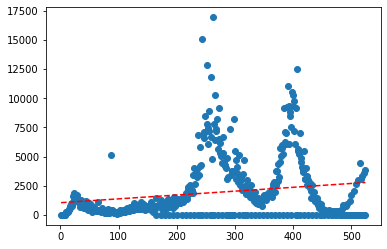

In [77]:
C=data['No_of_days_since_first_case']
D=data['Number of new cases']
TrendLine(C,D)

***TrendLine for Michigan State on New deaths column***

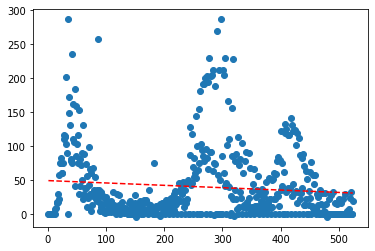

In [78]:
DD=data['Number of new deaths']
TrendLine(C,DD)

In [79]:
# Defining Confidence Intervel Funtion
def ConfidenceIntervel(x,y):
    ci = 1.96 * np.std(y)/np.sqrt(len(x))

    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

***ConfidenceLevel for Michigan State on new cases column***

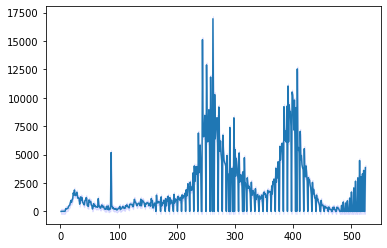

In [80]:
Z=data['No_of_days_since_first_case']
K=data['Number of new cases']
ConfidenceIntervel(Z,K)

***ConfidenceLevel for Michigan State on new deaths column***

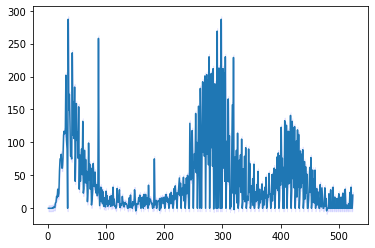

In [81]:
KK=data['Number of new deaths']
ConfidenceIntervel(Z,KK)

***Counties in Michigan Which are mostly at risk***

In [82]:
final_data1=final_data[final_data['County Name']!='statewide unallocated']
final_data1=final_data1[final_data1['State']=='MI']
final_data1=final_data1.groupby(["County Name"]).sum().reset_index()
final_data1=final_data1.drop(['countyFIPS','StateFIPS','population'],axis=1)
final_data1=final_data1.sort_values(by=['confirmed'],ascending=False)
final_data1=final_data1.head()
final_data1

,County Name,confirmed,deaths
81,wayne county,40438487,1776445
62,oakland county,28150717,796111
49,macomb county,22893411,758031
40,kent county,17595420,223080
24,genesee county,9433449,276243


In [83]:
final_data=final_data[final_data['State']=='MI']
top_five_counties=final_data[final_data["County Name"].isin(final_data1['County Name'])]
top_five_counties=top_five_counties.drop(['countyFIPS','StateFIPS','population'],axis=1)
top_five_counties['Number of New cases']=top_five_counties['confirmed'].diff()
top_five_counties['Number of New deaths']=top_five_counties['deaths'].diff()
top_five_counties=top_five_counties.dropna()

In [84]:
first_covid_case = top_five_counties[top_five_counties['confirmed'] > 0]['date'].min()

In [85]:
top_five_counties_details = top_five_counties[top_five_counties['date'] >= first_covid_case]
top_five_counties_details['day_since_first_covid_case'] = (top_five_counties_details['date'] - first_covid_case).dt.days
top_five_counties_details

C:\Users\hp\AppData\Local\Temp\ipykernel_10624\1504261234.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,County Name,State,date,confirmed,deaths,Number of New cases,Number of New deaths,day_since_first_covid_case
724320,genesee county,MI,2020-03-10,0,0,0.0,0.0,0
724321,genesee county,MI,2020-03-11,0,0,0.0,0.0,1
724322,genesee county,MI,2020-03-12,0,0,0.0,0.0,2
724323,genesee county,MI,2020-03-13,0,0,0.0,0.0,3
724324,genesee county,MI,2020-03-14,0,0,0.0,0.0,4
...,...,...,...,...,...,...,...,...
757501,wayne county,MI,2021-08-12,170477,5225,0.0,0.0,520
757502,wayne county,MI,2021-08-13,171056,5229,579.0,4.0,521
757503,wayne county,MI,2021-08-14,171056,5229,0.0,0.0,522
757504,wayne county,MI,2021-08-15,171056,5229,0.0,0.0,523


In [86]:
x=np.array(top_five_counties_details['day_since_first_covid_case']).reshape(-1, 1)
y=np.array(top_five_counties_details['Number of New cases'])

In [87]:
# Defining Linear regression model funtion
def LinearRegressionmodel(x_input,y_input):
    X_train, X_test, y_train, y_test = train_test_split(x1,y1, train_size = 0.7, test_size = 0.3, random_state = 25)
    model= LinearRegression()
    model.fit(X_train,y_train)
    p_y2 = model.predict(X_test)

    #predicting path
    p_days = 100
    days = x[-1] + np.arange(p_days)
    forecast = model.predict(days.reshape(-1, 1))
    plt.plot(days, forecast, '--', color='black')

    plt.scatter(X_test, y_test,  color='red')
    plt.plot(X_test, p_y2, color='blue', linewidth=2)
    plt.title('Linear Regression')
    plt.xlabel('No_of_days_since_first_case')
    plt.ylabel('Number of new cases')
    plt.show()

    print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, p_y2)))
    

In [88]:
# Defining Polynomial Regression model function
def PolynomialRegressionmodel(x_input,y_input):

    poly_Reg = PolynomialFeatures(degree=4)
    X_poly = poly_Reg.fit_transform(x)
    pol_Reg = LinearRegression()
    pol_Reg.fit(X_poly,y)   
    p_y3= pol_Reg.predict(X_poly)

    #predicting path
    p_days = 100
    days = x_input[-1] + np.arange(p_days)
    fore_poly = poly_Reg.fit_transform(days.reshape(-1, 1))
    forecast = pol_Reg.predict(fore_poly)
    plt.plot(days, forecast, '--', color='black')

    plt.scatter(x1, y1)
    plt.plot(x1,p_y1,color='red')
    plt.title('Polynomial Regression')
    plt.xlabel('No_of_days_since_first_case')
    plt.ylabel('Number of new cases')

    plt.show()

    print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y, p_y3)))

    


***These graphs also contain Forecast-Line***

County Name: genesee county


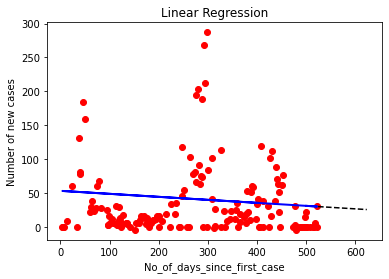

Root Mean Square Error: 52.66033043330702


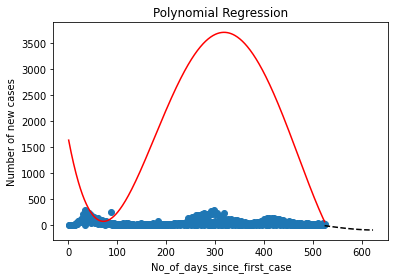

Root Mean Square Error: 108.25770003855679


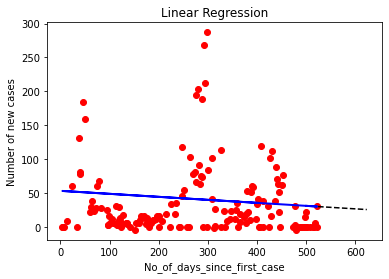

Root Mean Square Error: 52.66033043330702


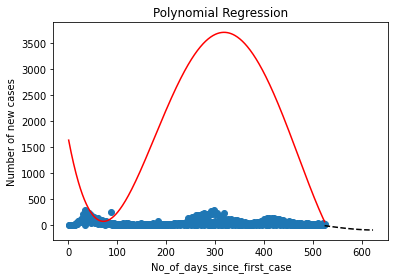

Root Mean Square Error: 108.25770003855679
County Name: kent county


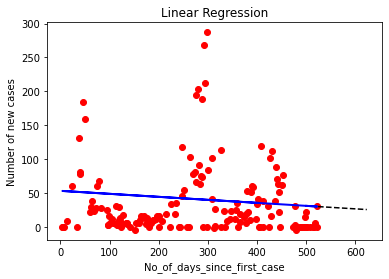

Root Mean Square Error: 52.66033043330702


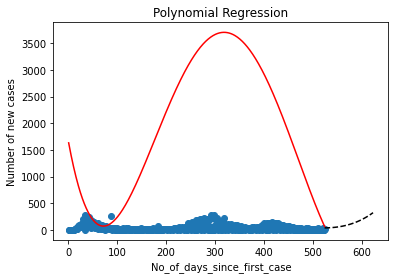

Root Mean Square Error: 185.78867123223392


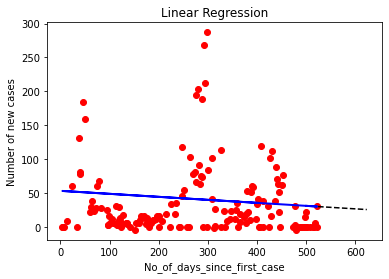

Root Mean Square Error: 52.66033043330702


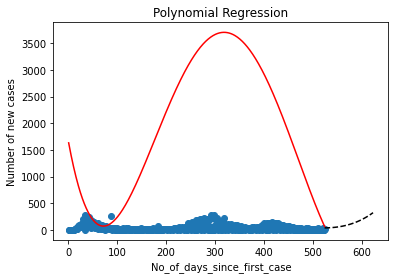

Root Mean Square Error: 185.78867123223392
County Name: macomb county


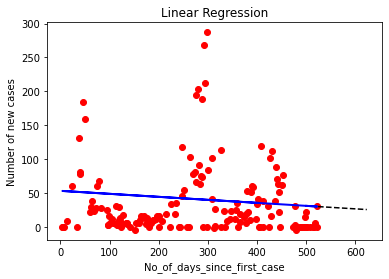

Root Mean Square Error: 52.66033043330702


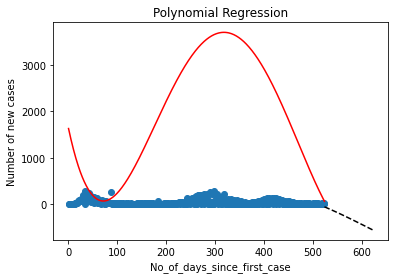

Root Mean Square Error: 253.8198943002081


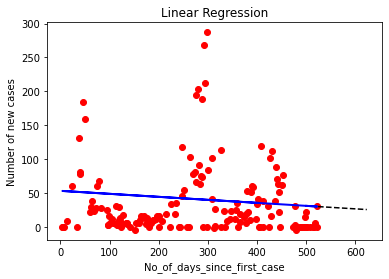

Root Mean Square Error: 52.66033043330702


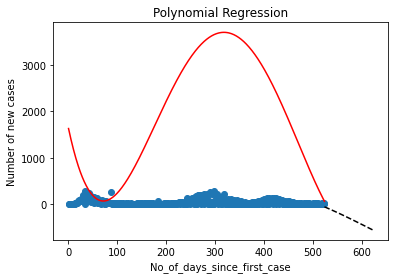

Root Mean Square Error: 253.8198943002081
County Name: oakland county


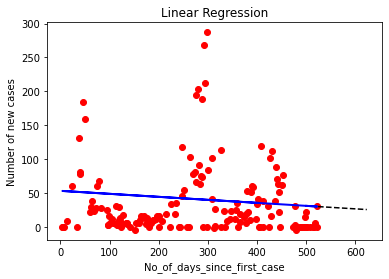

Root Mean Square Error: 52.66033043330702


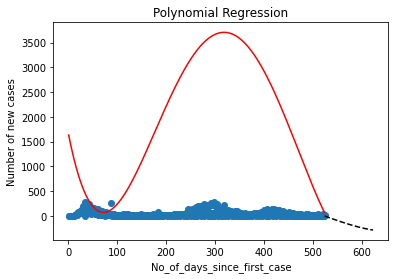

Root Mean Square Error: 288.7074888151241


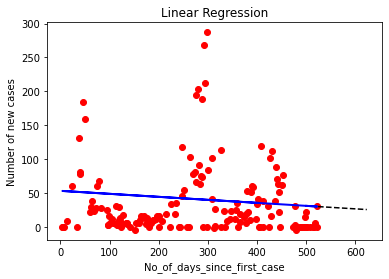

Root Mean Square Error: 52.66033043330702


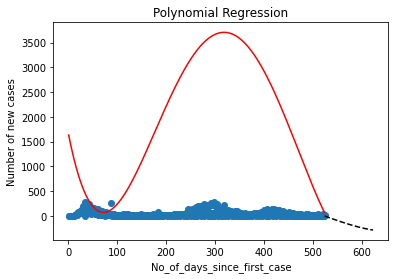

Root Mean Square Error: 288.7074888151241
County Name: wayne county


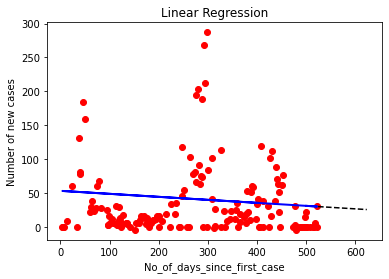

Root Mean Square Error: 52.66033043330702


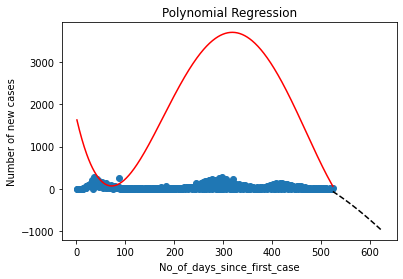

Root Mean Square Error: 377.7631940702452


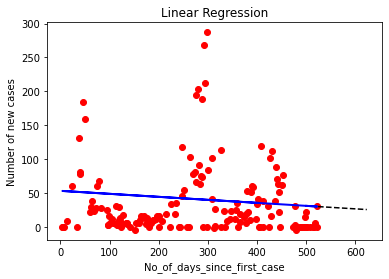

Root Mean Square Error: 52.66033043330702


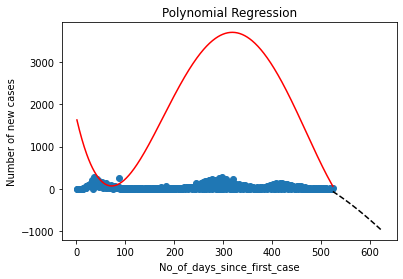

Root Mean Square Error: 377.7631940702452


In [89]:
for county in top_five_counties_details['County Name'].unique():
    print("County Name:",county)
    grouped_county_data = top_five_counties_details[top_five_counties_details['County Name'] == county]
    
    x = np.array(grouped_county_data[['day_since_first_covid_case']])
    y = np.array(grouped_county_data[['Number of New cases']])
    z = np.array(grouped_county_data[['Number of New deaths']])

    LinearRegressionmodel(x,y)
    PolynomialRegressionmodel(x,y)
    
    LinearRegressionmodel(x, z)
    PolynomialRegressionmodel(x, z)


***TrendLine & Confidence Intervel for Most affected counties in michigan state on New Cases column***

County Name: genesee county


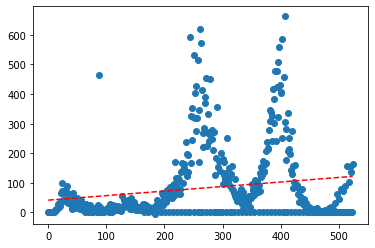

County Name: kent county


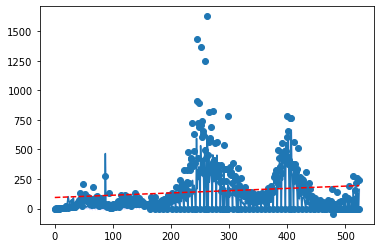

County Name: macomb county


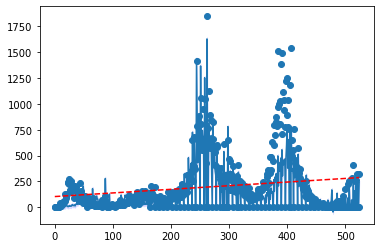

County Name: oakland county


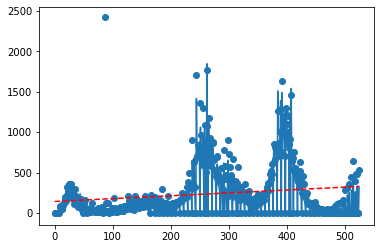

County Name: wayne county


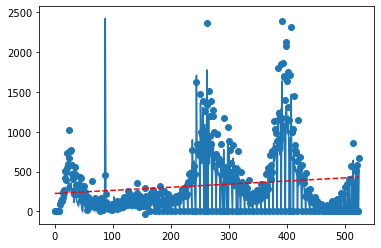

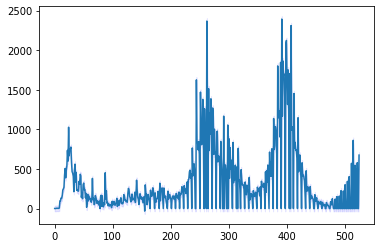

In [90]:
for county in top_five_counties_details['County Name'].unique():
    print("County Name:",county)
    grouped_county_data = top_five_counties_details[top_five_counties_details['County Name'] == county]
    
    x = grouped_county_data['day_since_first_covid_case']
    y = grouped_county_data['Number of New cases']

    TrendLine(x,y)
    ConfidenceIntervel(x,y)

    

***TrendLine & Confidence Intervel for Most affected counties in Michigan state on New deaths column***

County Name: genesee county


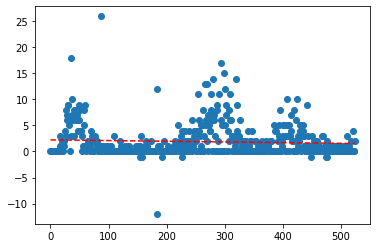

County Name: kent county


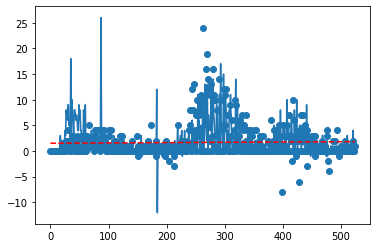

County Name: macomb county


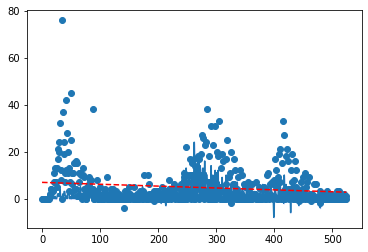

County Name: oakland county


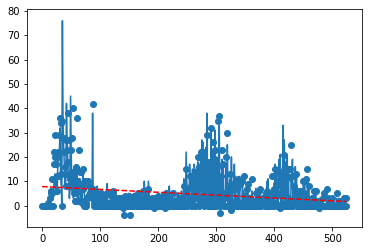

County Name: wayne county


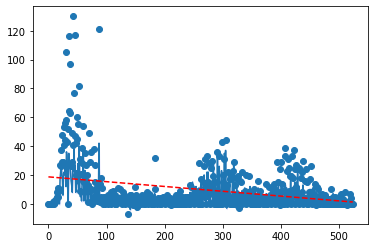

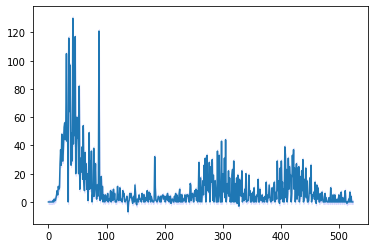

In [91]:
for county in top_five_counties_details['County Name'].unique():
    print("County Name:",county)
    grouped_county_data = top_five_counties_details[top_five_counties_details['County Name'] == county]
    
    x = grouped_county_data['day_since_first_covid_case']
    y = grouped_county_data['Number of New deaths']

    TrendLine(x,y)
    ConfidenceIntervel(x,y)

In [92]:
#reading enrichment data
Enrichment_data=pd.read_csv("../../../data/merging_covid_enrichment_data.csv")
Enrichment_data

,state,county,current_votes,total_votes,percent,countyFIPS,StateFIPS,date,confirmed,deaths,population
0,MI,barry county,15527,15598,100,26015,26,2020-01-22,0,0,61550
1,MI,barry county,15527,15598,100,26015,26,2020-01-23,0,0,61550
2,MI,barry county,15527,15598,100,26015,26,2020-01-24,0,0,61550
3,MI,barry county,15527,15598,100,26015,26,2020-01-25,0,0,61550
4,MI,barry county,15527,15598,100,26015,26,2020-01-26,0,0,61550
...,...,...,...,...,...,...,...,...,...,...,...
164446,WV,wyoming county,8320,8592,100,54109,54,2021-08-12,2185,41,20394
164447,WV,wyoming county,8320,8592,100,54109,54,2021-08-13,2185,41,20394
164448,WV,wyoming county,8320,8592,100,54109,54,2021-08-14,2185,41,20394
164449,WV,wyoming county,8320,8592,100,54109,54,2021-08-15,2185,41,20394


In [93]:
Enrichment_data=Enrichment_data.drop(['StateFIPS','countyFIPS'],axis=1)
Enrichment_data['Number of New Cases']=Enrichment_data['confirmed'].diff()
Enrichment_data['Number of New deaths']=Enrichment_data['deaths'].diff()
Enrichment_data=Enrichment_data.dropna()
Enrichment_data=Enrichment_data[Enrichment_data['state']=='MI']
Enrichment_data

,state,county,current_votes,total_votes,percent,date,confirmed,deaths,population,Number of New Cases,Number of New deaths
1,MI,barry county,15527,15598,100,2020-01-23,0,0,61550,0.0,0.0
2,MI,barry county,15527,15598,100,2020-01-24,0,0,61550,0.0,0.0
3,MI,barry county,15527,15598,100,2020-01-25,0,0,61550,0.0,0.0
4,MI,barry county,15527,15598,100,2020-01-26,0,0,61550,0.0,0.0
5,MI,barry county,15527,15598,100,2020-01-27,0,0,61550,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5725,MI,wayne county,5813,5878,100,2021-08-12,170477,5225,1749343,0.0,0.0
5726,MI,wayne county,5813,5878,100,2021-08-13,171056,5229,1749343,579.0,4.0
5727,MI,wayne county,5813,5878,100,2021-08-14,171056,5229,1749343,0.0,0.0
5728,MI,wayne county,5813,5878,100,2021-08-15,171056,5229,1749343,0.0,0.0


***Hypothesis testing***

***Assuming that our hypothesis are: Null Hypothesis: A >= B; Alternative Hypothesis: A < B.***


In [94]:
def twotailonesample(A,B):
    A.mean()
    B.mean()
    print(stats.ttest_ind(A, B, axis=0, equal_var=True))

In [95]:
A=np.array(Enrichment_data['total_votes'])
B=np.array(data['Number of new cases'])

In [96]:
twotailonesample(B,A)

Ttest_indResult(statistic=-10.267428898911987, pvalue=1.546215197911872e-24)


In [97]:
twotailonesample(A,B)

Ttest_indResult(statistic=10.267428898911987, pvalue=1.546215197911872e-24)


****I have noticed that no matter whether or not we write 'ttest_ind(A,B)' or 'ttest_ind(B,A)'. The statistics and p-value does not change. Because By default, Python Scipy library does not give an option for us to perform one-tailed two sample test. The p-value is computed based on the assumption of two-tailed two sample test.****

***As the real p value is so close to 1, we cannot reject the null hypothesis***

In [98]:
C=np.array(Enrichment_data['current_votes'])
D=np.array(data['Number of new cases'])

In [99]:
twotailonesample(C,D)

Ttest_indResult(statistic=10.266008951544261, pvalue=1.568751529543907e-24)


***As the real p value is so close to 1, we cannot reject the null hypothesis***

In [100]:
E=np.array(Enrichment_data['percent'])
F=np.array(data['Number of new cases'])

In [101]:
twotailonesample(E,F)

Ttest_indResult(statistic=-52.90266196595491, pvalue=0.0)


***As the real p value is 0, we can reject the null hypothesis***

In [102]:
G=np.array(Enrichment_data['total_votes'])
H=np.array(data['Number of new deaths'])

In [103]:
twotailonesample(G,H)

Ttest_indResult(statistic=10.708576820886814, pvalue=1.5740531702846445e-26)


***As the real p value is so close to 1, we cannot reject the null hypothesis***

In [104]:
I=np.array(Enrichment_data['percent'])
J=np.array(data['Number of new deaths'])

In [105]:
twotailonesample(I,J)

Ttest_indResult(statistic=84.32437854025726, pvalue=0.0)


***As the real p value is 0, we can reject the null hypothesis***